In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error




In [50]:
# Load the dataset into a Pandas dataframe
Train_data = pd.read_csv('Train.csv')
Test_data=pd.read_csv('Test.csv')

In [51]:
Train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [52]:
# Print the first few rows of the dataset
Train_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
Test_data.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [54]:
# Print the shape of the data
print('Shape of Train data :',Train_data.shape)
print('Shape of Test data:',Test_data.shape)

Shape of Train data : (8523, 12)
Shape of Test data: (5681, 11)


In [55]:
print(Train_data.info()) # print the data types and non-null values of each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [56]:
print(Test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [57]:
# count the number of missing values in each column
print(Train_data.isnull().sum()) 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [58]:
print(Test_data.isnull().sum()) 

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [59]:
# Create a new feature: Outlet_Years
import datetime

current_year = datetime.datetime.now().year

Train_data['Outlet_Years'] = current_year - Train_data['Outlet_Establishment_Year']

# Create a new feature: Outlet_Years Test
Test_data['Outlet_Years'] = current_year - Test_data['Outlet_Establishment_Year']


<Axes: >

<Figure size 600x600 with 0 Axes>

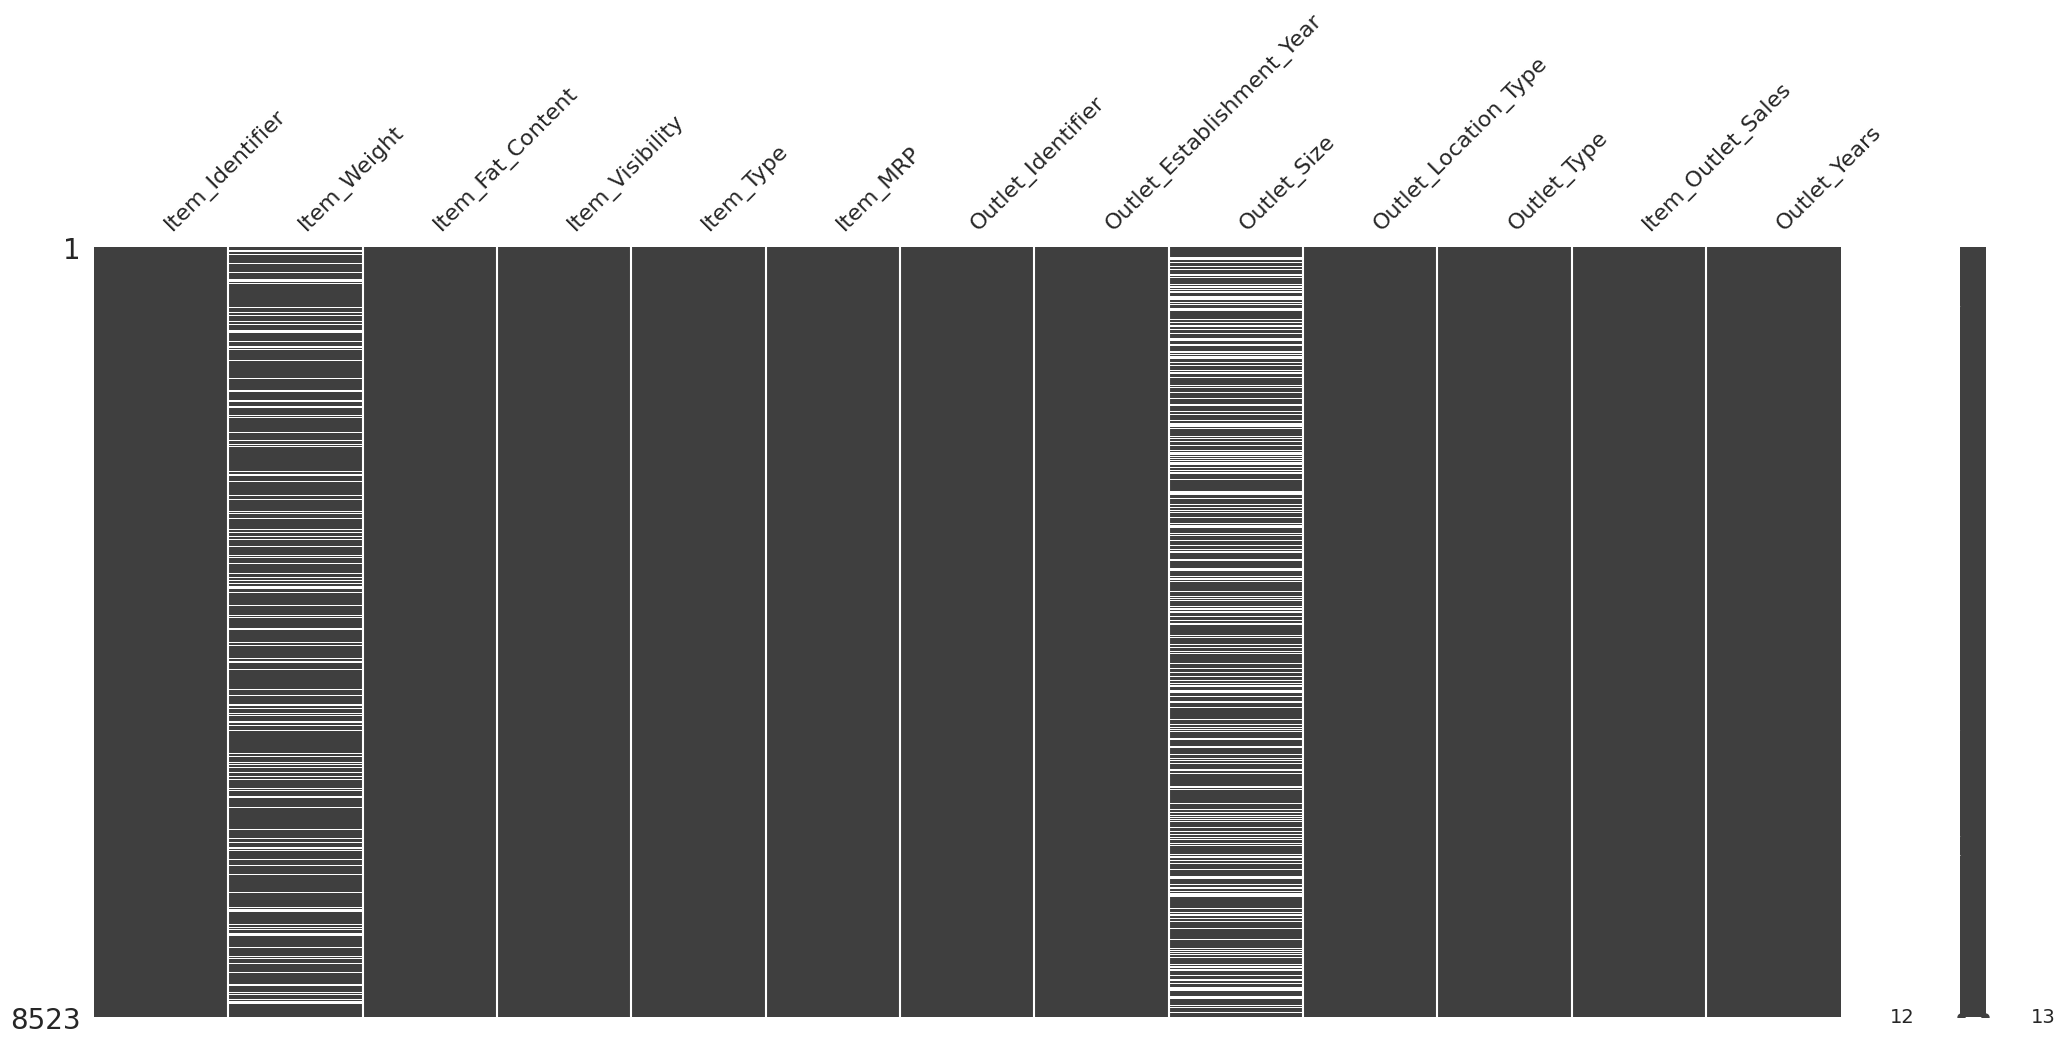

In [60]:
# Visualize missing data
plt.figure(figsize=(6,6))
msno.matrix(Train_data)

#Data Preparation


This new feature represents the number of years since the outlet was established. The reason why 2013 is used as the base year is because the data was collected in 2013. Therefore, subtracting the establishment year from 2013 gives us the age of the outlet at the time the data was collected.

This code creates a new feature called "Item_Identifier_Type" by taking the first two characters of the "Item_Identifier" column. The lambda function lambda x: x[:2] takes a string x and returns the first two characters of that string.

For example, if the "Item_Identifier" column contains values like "FD001", "DR234", and "NC789", the "Item_Identifier_Type" column will contain values like "FD", "DR", and "NC". This new feature may help the model capture any patterns or trends associated with specific types of items.

In [61]:
# Create a new feature: Item_Identifier_Type
Train_data['Item_Identifier_Type'] = Train_data['Item_Identifier'].apply(lambda x: x[:2])
Test_data['Item_Identifier_Type'] = Test_data['Item_Identifier'].apply(lambda x: x[:2])

Remove the Item_Identifier and Outlet_Identifier columns from the dataframe. These columns are not useful for modeling as they are unique identifiers for each item and store.

In [62]:
# Remove unwanted columns
Train_data = Train_data.drop(['Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year'], axis=1)
Test_data = Test_data.drop(['Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year'], axis=1)

In [63]:
# Assuming 'df' is the pandas dataframe and 'column_name' is the name of the column you want to check
unique_values = Train_data['Item_Type'].unique()
print(unique_values)


['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [64]:
#unique_values = Train_data['Item_Fat_Content'].unique()
#print(unique_values)

# For Test data
unique_values = Test_data['Item_Fat_Content'].unique()
print(unique_values)

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


Data transformation


In [65]:
#'Item_Fat_Content' is the name of the column  to encode
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'low fat': 'Low Fat','LF': 'Low Fat','reg': 'Regular'})

# For Test data
Test_data['Item_Fat_Content'] = Test_data['Item_Fat_Content'].replace({'low fat': 'Low Fat','LF': 'Low Fat','reg': 'Regular'})


In [66]:
# Check for missing values
Train_data.isnull().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Years               0
Item_Identifier_Type       0
dtype: int64

Fill missing values in the Item_Weight and Outlet_Size columns 
with their respective medians and an "Unknown" category, 
respectively. 

Missing values can cause issues during modeling, so it's important to handle them appropriately.

For categorical variables, you could use the mode (most frequent value) to fill missing values 

In [67]:
# Fill missing values with median
Train_data['Item_Weight'].fillna(Train_data['Item_Weight'].median(), inplace=True)
Test_data['Item_Weight'].fillna(Test_data['Item_Weight'].median(),inplace=True)
# Fill missing values in the Outlet_Size column with the mode
mode = Train_data['Outlet_Size'].mode()[0]
Train_data['Outlet_Size'].fillna(mode, inplace=True)
#for Test
mode = Test_data['Outlet_Size'].mode()[0]
Test_data['Outlet_Size'].fillna(mode, inplace=True)

In [68]:
# Get summary statistics for numerical variables
Train_data.describe().T



,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.813420,4.227240,4.555,9.310000,12.600000,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800
Outlet_Years,8523.0,25.168133,8.371760,14.000,19.000000,24.000000,36.000000,38.000000


In [69]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.014168,0.024951,0.009693,-0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.009693,-0.128625,0.567574,1.000000,0.049135
Outlet_Years,-0.007739,0.074834,-0.005020,0.049135,1.000000


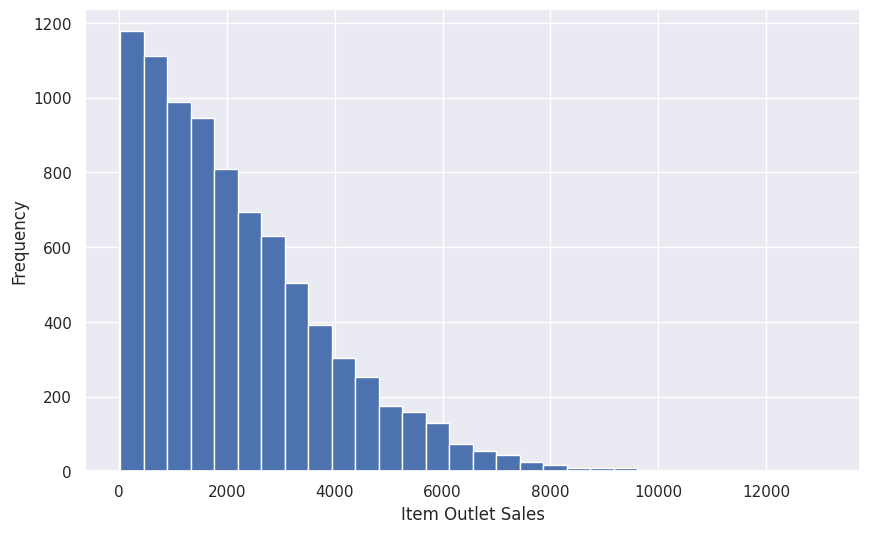

In [70]:

sns.set()
# Plot a histogram of the target variable
plt.figure(figsize=(10,6))
plt.hist(Train_data['Item_Outlet_Sales'], bins=30)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()





<ipython-input-71-428a111aa77b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_data["Item_Outlet_Sales"])


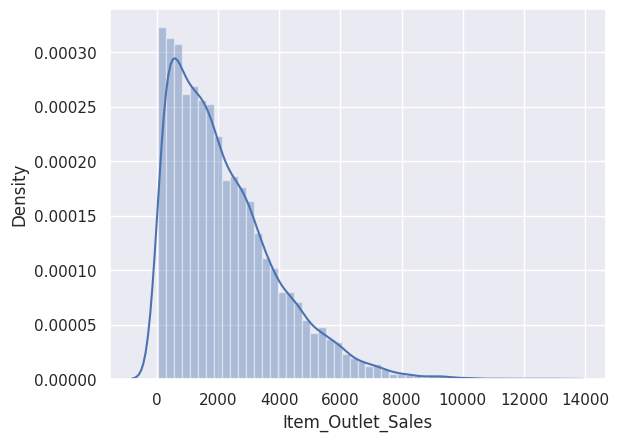

In [71]:
# Explore the distribution of the target variable (Item_Outlet_Sales)
sns.distplot(Train_data["Item_Outlet_Sales"])
plt.show()



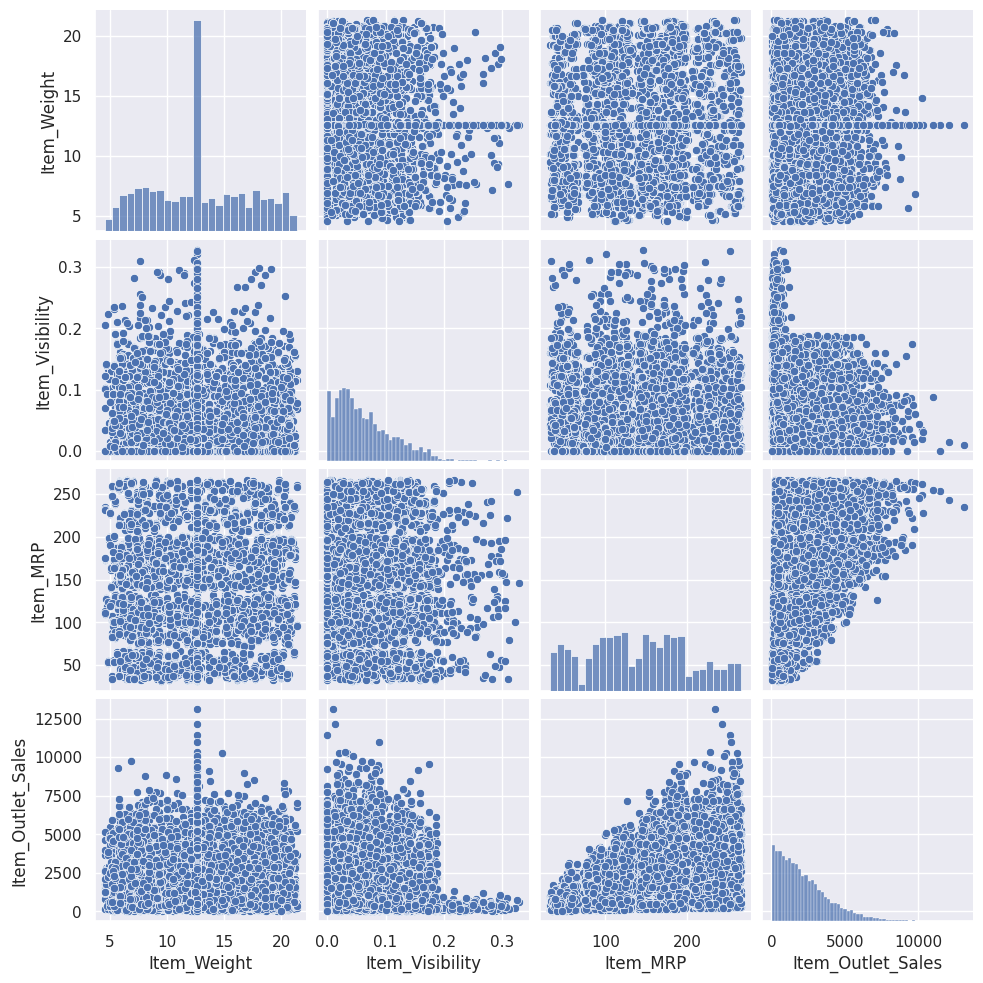

In [72]:
# Explore the relationship between the target variable and continuous features (Item_Weight, Item_Visibility, Item_MRP)
sns.pairplot(data=Train_data, vars=["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"])
plt.show()



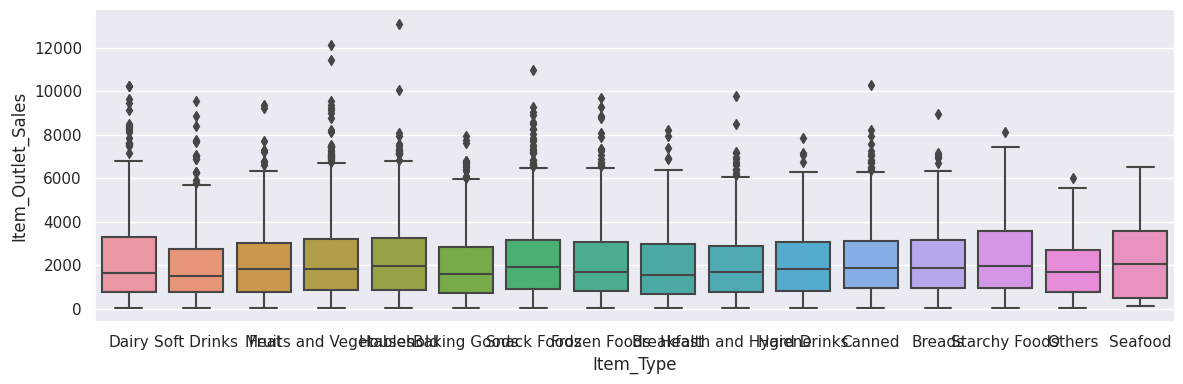

In [73]:
# Explore the relationship between the target variable and categorical features (Item_Type, Outlet_Size, Outlet_Location_Type)
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", data=Train_data, kind="box", height=4, aspect=3)
plt.show()

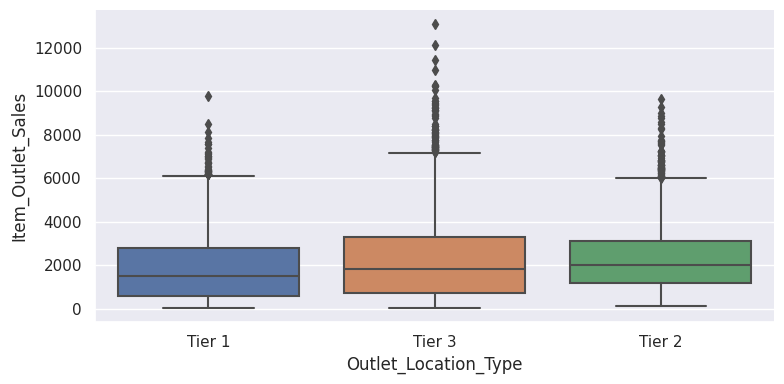

In [74]:
sns.catplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=Train_data, kind="box", height=4, aspect=2)
plt.show()

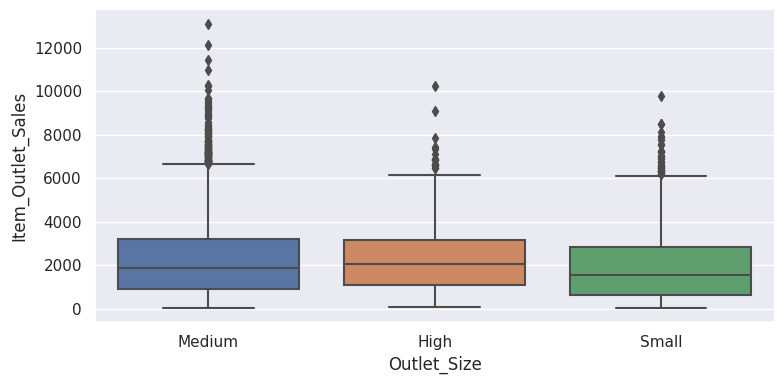

In [75]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", data=Train_data, kind="box", height=4, aspect=2)
plt.show()

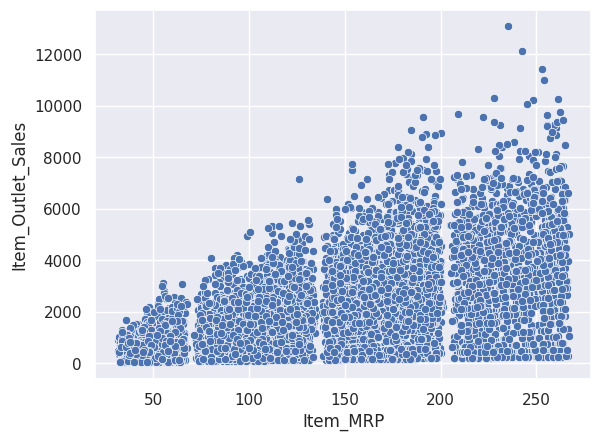

In [76]:
# Plot a scatterplot of the target variable against Item_MRP
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=Train_data)
plt.show()

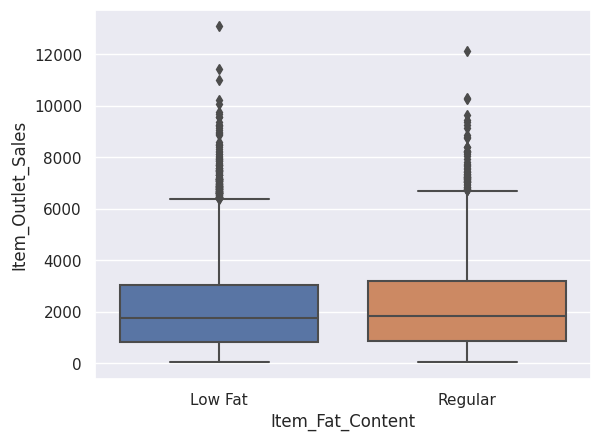

In [77]:
# Plot a boxplot of the target variable by Item_Fat_Content
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=Train_data)
plt.show()

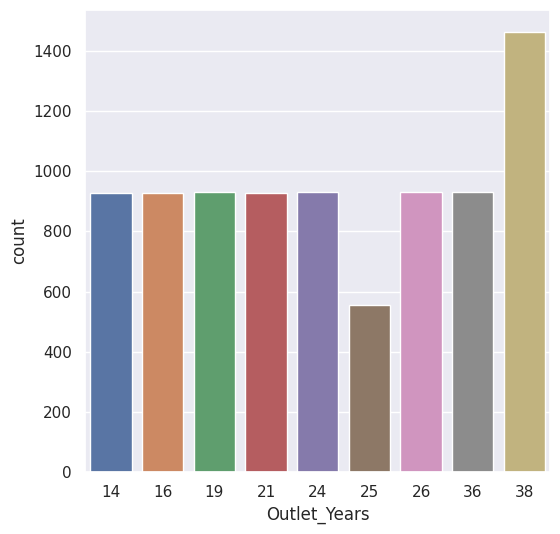

In [78]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Years', data=Train_data)
plt.show()

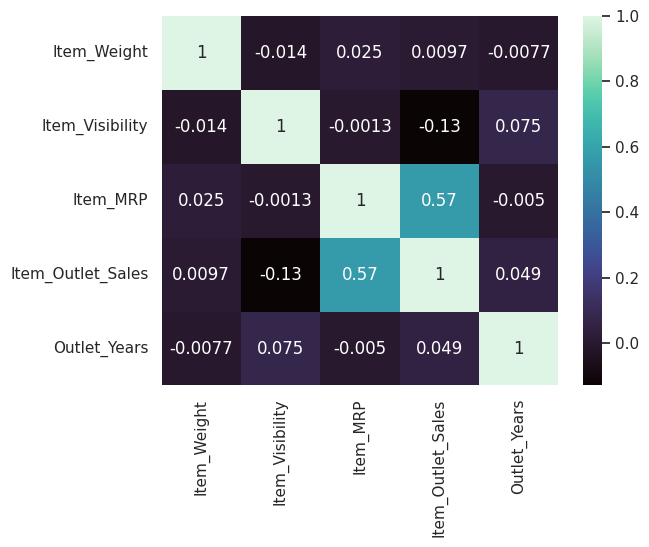

In [79]:
# Create a correlation matrix of numerical variables
corr_matrix = Train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.show()

#Label encode categorical variables


We use LabelEncoder to encode categorical variables as numerical values. This is because many machine learning algorithms require numerical input data, and cannot directly process categorical variables in their raw form.

LabelEncoder would assign the values 0, 1, and 2 to each category, respectively.

For Train data

In [80]:
le = LabelEncoder()
Train_data['Item_Fat_Content'] = le.fit_transform(Train_data['Item_Fat_Content'])
Train_data['Outlet_Size'] = le.fit_transform(Train_data['Outlet_Size'])
Train_data['Outlet_Location_Type'] = le.fit_transform(Train_data['Outlet_Location_Type'])
Train_data['Outlet_Type'] = le.fit_transform(Train_data['Outlet_Type'])
Train_data['Item_Type'] = le.fit_transform(Train_data[['Item_Type']])
Train_data['Item_Identifier_Type']=le.fit_transform(Train_data['Item_Identifier_Type'])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Test data

In [81]:
le = LabelEncoder()
Test_data['Item_Fat_Content'] = le.fit_transform(Test_data['Item_Fat_Content'])
Test_data['Outlet_Size'] = le.fit_transform(Test_data['Outlet_Size'])
Test_data['Outlet_Location_Type'] = le.fit_transform(Test_data['Outlet_Location_Type'])
Test_data['Outlet_Type'] = le.fit_transform(Test_data['Outlet_Type'])
Test_data['Item_Type'] = le.fit_transform(Test_data[['Item_Type']])
Test_data['Item_Identifier_Type']=le.fit_transform(Test_data['Item_Identifier_Type'])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Scale numerical variables

We use StandardScaler to scale numerical features in a dataset to have zero mean and unit variance.

This makes the feature values more comparable across different scales and improves the numerical stability 

For Train data

In [82]:
scaler = StandardScaler()
Train_data['Item_MRP'] = scaler.fit_transform(Train_data[['Item_MRP']])
Train_data['Item_Weight'] = scaler.fit_transform(Train_data[['Item_Weight']])
Train_data['Outlet_Years'] = scaler.fit_transform(Train_data[['Outlet_Years']])
Train_data['Item_Visibility'] = scaler.fit_transform(Train_data[['Item_Visibility']])


For Test data

In [83]:
scaler = StandardScaler()
Test_data['Item_MRP'] = scaler.fit_transform(Test_data[['Item_MRP']])
Test_data['Item_Weight'] = scaler.fit_transform(Test_data[['Item_Weight']])
Test_data['Outlet_Years'] = scaler.fit_transform(Test_data[['Outlet_Years']])
Test_data['Item_Visibility'] = scaler.fit_transform(Test_data[['Item_Visibility']])


In [84]:
Train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Identifier_Type
0,-0.831187,0,-0.970732,4,1.747454,1,0,1,3735.1380,-0.139541,1
1,-1.630810,1,-0.908111,14,-1.489023,1,2,2,443.4228,-1.334103,0
2,1.108727,0,-0.956917,10,0.010040,1,0,1,2097.2700,-0.139541,1
3,1.510904,1,-1.281758,6,0.660050,1,2,0,732.3800,-0.020085,1
4,-0.918719,0,-1.281758,9,-1.399220,0,2,1,994.7052,1.293934,2
...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.407246,0,-0.181193,13,1.180783,0,2,1,2778.3834,1.293934,1
8519,-1.048835,1,-0.371154,0,-0.527301,1,1,1,549.2850,-0.497909,1
8520,-0.523639,0,-0.599784,8,-0.897208,2,1,1,1193.1136,-0.736822,2
8521,-1.325628,1,1.532880,13,-0.607977,1,2,2,1845.5976,-1.334103,1


In [85]:
import joblib 

In [86]:
joblib.dump(scaler,r'D:\final\Project2A\Projectworking\models\sc.sav')

['D:\\final\\Project2A\\Projectworking\\models\\sc.sav']

In [87]:
# Extract the feature matrix X and target variable y
X_Train= Train_data.drop(columns=['Item_Outlet_Sales'])
y_Train= Train_data['Item_Outlet_Sales']
X_Test=Test_data

In [88]:
Test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Identifier_Type
0,1.905090,0,-1.134077,13,-0.536555,1,0,1,-0.139891,1
1,-1.027457,1,-0.531850,4,-0.868937,1,1,1,-1.095512,1
2,0.456482,0,0.661316,11,1.629848,1,2,0,-0.020438,2
3,-1.259469,0,-0.981416,13,0.226697,1,1,1,-1.095512,1
4,-0.038164,1,1.032540,4,1.508110,1,2,3,1.532446,1
...,...,...,...,...,...,...,...,...,...,...
5676,-0.509256,1,-1.018333,13,0.004727,2,0,1,0.099015,1
5677,-1.192339,1,1.508493,15,0.455014,1,2,2,-1.334417,1
5678,-0.627029,0,0.153074,8,-0.360485,1,1,1,-0.498248,2
5679,0.621365,1,-1.281690,3,1.190844,1,1,1,-1.095512,1


In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Train, y_Train, test_size=0.2, random_state=42)

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6818, 10)
(1705, 10)
(6818,)
(1705,)


In [91]:

# Define models to evaluate
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),XGBRegressor()]

# Train and evaluate each model
for model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # create dataframes for actual and predicted values
    df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

   

    
    print(df_comparison)
    print(f"{type(model).__name__} R^2 score on testing set: {r2:.4f}, Mean Squared Error (MSE): {mse:.4f}, Root Mean Squared Error (RMSE): {rmse:.4f}, Mean Absolute Error (MAE): {mae:.4f}")
    print("*****************************************************************************************************************************************************************************************************")



         Actual    Predicted
7503  1743.0644  1095.876876
2957   356.8688   601.130713
7031   377.5086  1052.275829
1084  5778.4782  4244.717111
856   2356.9320  2765.188638
...         ...          ...
7205  3004.0896  1950.111387
3257   890.8404  2875.476185
6346   629.1810   550.596983
6318   253.0040  1171.680041
6339   976.7286  1604.833373

[1705 rows x 2 columns]
LinearRegression R^2 score on testing set: 0.5243, Mean Squared Error (MSE): 1293026.2396, Root Mean Squared Error (RMSE): 1137.1131, Mean Absolute Error (MAE): 856.0570
*****************************************************************************************************************************************************************************************************
         Actual  Predicted
7503  1743.0644   322.2472
2957   356.8688   596.5568
7031   377.5086   209.7270
1084  5778.4782  5000.8238
856   2356.9320  2348.9424
...         ...        ...
7205  3004.0896  1478.0760
3257   890.8404  2354.2688
6346   629.1810 

In [92]:
joblib.dump(scaler,r'D:\final\Project2A\Projectworking\models\sc.sav')

['D:\\final\\Project2A\\Projectworking\\models\\sc.sav']

Mean squared error (MSE) measures the average squared difference between the predicted and actual values. It gives more weight to larger errors, so a high MSE indicates a model that is not performing well.

Root mean squared error (RMSE) is the square root of the MSE and is expressed in the same units as the target variable. It is a popular evaluation metric because it is interpretable and penalizes large errors.

Mean absolute error (MAE) measures the average absolute difference between the predicted and actual values. It gives equal weight to all errors and is less sensitive to outliers than MSE.

R-squared (R^2) score measures how much of the variation in the target variable can be explained by the model. It ranges from 0 to 1, with 1 indicating that the model perfectly predicts the target variable and 0 indicating that the model does not explain any of the variation in the target variable beyond the mean value.

By calculating these evaluation metrics, we can get a better understanding of how well our model is performing and where it may need improvement.







In [93]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [94]:
# Use GridSearchCV to find the best hyperparameters
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_



In [96]:
# Train the model using the best hyperparameters
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [99]:
# Evaluate the model on the testing set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE on testing set: ", rmse)

RMSE on testing set:  1021.9468667949637



Random Forest Regressor is better than others
So we use this for prediction

In [101]:
# predict Unseen data (Test data)
# Define models to evaluate
models =  RandomForestRegressor()
models.fit(X_Train, y_Train)
# Make predictions on the testing data
y_pred = models.predict(X_Test)
df_predicted = pd.DataFrame(y_pred, columns=['Predicted'])
print(df_predicted)


        Predicted
0     1625.464146
1     1492.610414
2      744.923672
3     2443.452710
4     5936.772150
...           ...
5676  2343.003464
5677  3192.204732
5678  1675.978392
5679  4874.235246
5680  1484.387784

[5681 rows x 1 columns]
